<center><img src='../img/Untitled design.png'></center>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('preprocessed.csv')
df.head(10)

,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Country,Race Dates,Time_seconds,Driver_code,Country_code,Team_code
0,1,44,Lewis Hamilton,Mercedes,58.0,1:31:54.067,25.0,Flag of AustraliaAustralia,2015-03-15,5514.067,26,0,23
1,2,6,Nico Rosberg,Mercedes,58.0,+1.360s,18.0,Flag of AustraliaAustralia,2015-03-15,1.360,34,0,23
2,3,5,Sebastian Vettel,Ferrari,58.0,+34.523s,15.0,Flag of AustraliaAustralia,2015-03-15,34.523,47,0,10
3,4,19,Felipe Massa,Williams Mercedes,58.0,+38.196s,12.0,Flag of AustraliaAustralia,2015-03-15,38.196,10,0,40
4,5,12,Felipe Nasr,Sauber Ferrari,58.0,+95.149s,10.0,Flag of AustraliaAustralia,2015-03-15,95.149,11,0,35
5,6,3,Daniel Ricciardo,Red Bull Racing Renault,57.0,+1 lap,8.0,Flag of AustraliaAustralia,2015-03-15,90.000,6,0,31
6,7,27,Nico Hulkenberg,Force India Mercedes,57.0,+1 lap,6.0,Flag of AustraliaAustralia,2015-03-15,90.000,33,0,11
7,8,9,Marcus Ericsson,Sauber Ferrari,57.0,+1 lap,4.0,Flag of AustraliaAustralia,2015-03-15,90.000,29,0,35
8,9,55,Carlos Sainz,STR Renault,57.0,+1 lap,2.0,Flag of AustraliaAustralia,2015-03-15,90.000,4,0,34
9,10,11,Sergio Perez,Force India Mercedes,57.0,+1 lap,1.0,Flag of AustraliaAustralia,2015-03-15,90.000,49,0,11


In [3]:
df.shape

(3931, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3931 entries, 0 to 3930
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pos.            3931 non-null   object 
 1   No.             3931 non-null   int64  
 2   Driver          3931 non-null   object 
 3   Team            3931 non-null   object 
 4   Laps            3931 non-null   float64
 5   Time / Retired  3931 non-null   object 
 6   Pts.            3931 non-null   float64
 7   Country         3931 non-null   object 
 8   Race Dates      3931 non-null   object 
 9   Time_seconds    3931 non-null   float64
 10  Driver_code     3931 non-null   int64  
 11  Country_code    3931 non-null   int64  
 12  Team_code       3931 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 399.4+ KB


In [5]:
df.columns

Index(['Pos.', 'No.', 'Driver', 'Team', 'Laps', 'Time / Retired', 'Pts.',
       'Country', 'Race Dates', 'Time_seconds', 'Driver_code', 'Country_code',
       'Team_code'],
      dtype='object')

In [9]:
df['Pos.'].value_counts()

Pos.
1     233
2     233
3     233
4     233
5     233
6     233
7     233
8     233
9     233
10    233
11    232
12    229
13    226
14    218
15    206
16    177
17    139
18     91
19     47
20     20
21      4
22      2
Name: count, dtype: int64

In [13]:
df = df[df['Pos.'] != 'DQ']
df = df[df['Pos.'] != 'EX']
df['Pos.'] = df['Pos.'].astype(int)
df['Pos.'].dtypes

dtype('int32')

In [14]:
# Suppose your position column is 'Pos.'
df['Pos_class'] = df['Pos.'].apply(lambda x: x if x <= 10 else 11)

In [15]:
df = df[['Pos.', 'No.', 'Laps', 'Pts.','Time_seconds', 'Driver_code', 'Country_code','Team_code','Pos_class']]
df.head(10)

,Pos.,No.,Laps,Pts.,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
0,1,44,58.0,25.0,5514.067,26,0,23,1
1,2,6,58.0,18.0,1.360,34,0,23,2
2,3,5,58.0,15.0,34.523,47,0,10,3
3,4,19,58.0,12.0,38.196,10,0,40,4
4,5,12,58.0,10.0,95.149,11,0,35,5
5,6,3,57.0,8.0,90.000,6,0,31,6
6,7,27,57.0,6.0,90.000,33,0,11,7
7,8,9,57.0,4.0,90.000,29,0,35,8
8,9,55,57.0,2.0,90.000,4,0,34,9
9,10,11,57.0,1.0,90.000,49,0,11,10


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3921 entries, 0 to 3930
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pos.          3921 non-null   int32  
 1   No.           3921 non-null   int64  
 2   Laps          3921 non-null   float64
 3   Pts.          3921 non-null   float64
 4   Time_seconds  3921 non-null   float64
 5   Driver_code   3921 non-null   int64  
 6   Country_code  3921 non-null   int64  
 7   Team_code     3921 non-null   int64  
 8   Pos_class     3921 non-null   int64  
dtypes: float64(3), int32(1), int64(5)
memory usage: 291.0 KB


In [17]:
df.isna().sum().sum()

0

In [18]:
df.duplicated().sum()

24

In [19]:
correlation = df.corr()
correlation

,Pos.,No.,Laps,Pts.,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
Pos.,1.000000,0.030911,-0.037826,-0.880825,-0.371427,0.028154,0.026446,-0.020322,0.933178
No.,0.030911,1.000000,0.015094,0.008127,-0.008179,0.008687,0.000670,0.025137,-0.003405
Laps,-0.037826,0.015094,1.000000,0.039972,0.024019,-0.002047,-0.032639,0.005037,-0.031920
Pts.,-0.880825,0.008127,0.039972,1.000000,0.615210,0.031204,-0.012713,0.048186,-0.973515
Time_seconds,-0.371427,-0.008179,0.024019,0.615210,1.000000,0.050214,0.000387,0.065764,-0.456691
Driver_code,0.028154,0.008687,-0.002047,0.031204,0.050214,1.000000,-0.018343,-0.135633,-0.010129
Country_code,0.026446,0.000670,-0.032639,-0.012713,0.000387,-0.018343,1.000000,-0.009059,0.016002
Team_code,-0.020322,0.025137,0.005037,0.048186,0.065764,-0.135633,-0.009059,1.000000,-0.036481
Pos_class,0.933178,-0.003405,-0.031920,-0.973515,-0.456691,-0.010129,0.016002,-0.036481,1.000000


<Axes: >

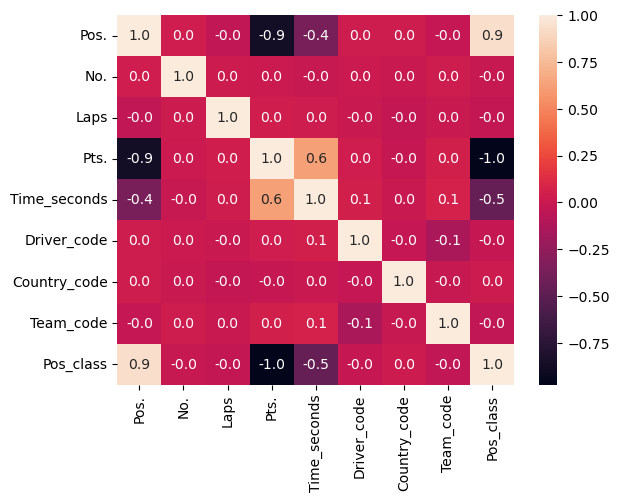

In [20]:
plt.figure()
sns.heatmap(correlation,fmt='.1f',annot=True)

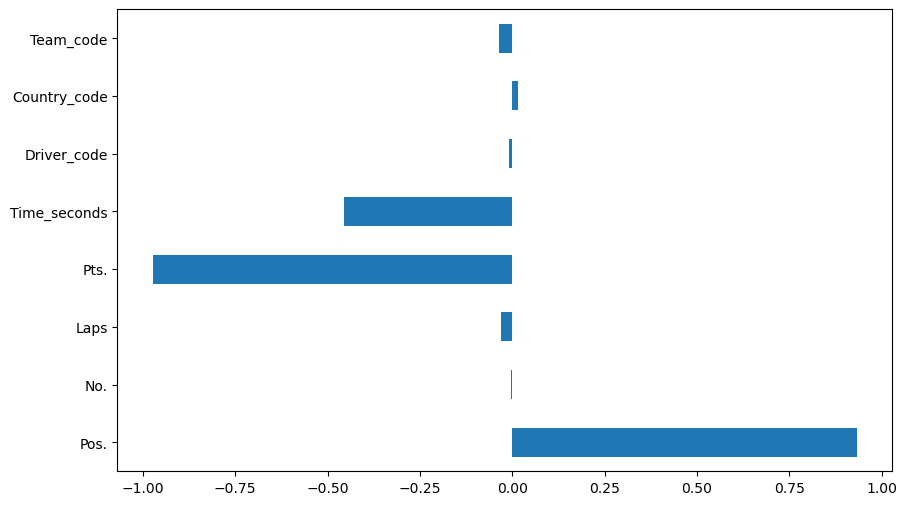

In [21]:
correlation_values = df.corr()['Pos_class'].drop('Pos_class')
correlation_values.plot(kind='barh', figsize=(10, 6))
plt.show()

In [22]:
df.shape

(3921, 9)

In [23]:
j = 0
for i in df.columns: 
    if ((correlation[i] <= 0).sum()) >= 4:
        j = j+1
        print(j,'.',i,(correlation[i] <= 0).sum())

1 . Pos. 4
2 . Laps 4
3 . Driver_code 4
4 . Country_code 4
5 . Team_code 4
6 . Pos_class 6


## Spliting Data

In [24]:
X = df.drop('Pos_class',axis=1)
y = df['Pos_class']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of y_test : ', y_test.shape)

Size of X_train :  (2940, 8)
Size of y_train :  (2940,)
Size of X_test :  (981, 8)
Size of y_test :  (981,)


## <u> RandomRandomForestClassifier </u>

In [26]:
rfc = RandomForestClassifier(n_estimators=100,random_state=25)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=25)

### Training

In [27]:
training_pred = rfc.predict(X_train)
training_pred

array([ 8, 11, 11, ...,  9,  6, 10], dtype=int64)

In [28]:
accuracy = accuracy_score(y_train,training_pred)
print("Accuracy Score: ",accuracy)

Accuracy Score:  1.0


In [29]:
cm = confusion_matrix(y_train,training_pred)
cm

array([[ 165,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  176,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,  178,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  183,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  167,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  174,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  179,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  178,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  173,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  183,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1184]],
      dtype=int64)

In [30]:
df['Pos_class'].value_counts()

Pos_class
11    1591
1      233
2      233
3      233
4      233
5      233
6      233
7      233
8      233
9      233
10     233
Name: count, dtype: int64

In [31]:
import matplotlib.pyplot as plt

def confusion_plot(y_true, y_pred, cm):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set(title="Confusion Matrix")

    n_classes = 11
    tick_positions = list(range(n_classes))          # 0 to 20
    labels = [f"Position {i+1}" for i in range(n_classes)]

    ax.imshow(cm, cmap="Blues")

    ax.set_xticks(tick_positions)
    ax.set_yticks(tick_positions)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_yticklabels(labels)

    # Write values inside cells
    for i in range(n_classes):
        for j in range(n_classes):
            ax.text(
                j, i, cm[i, j],
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2 else "black"
            )

    plt.tight_layout()
    plt.show()

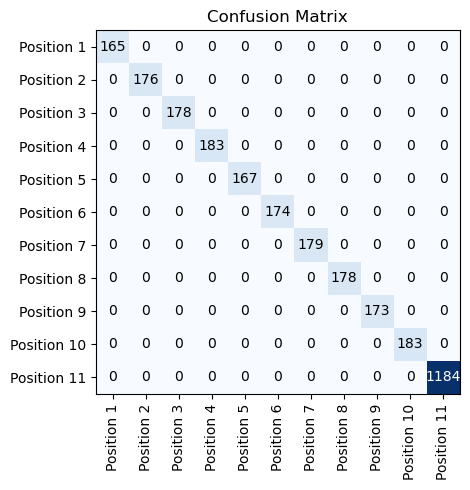

In [32]:
confusion_plot(y_train,training_pred,cm)

In [33]:
report = classification_report(y_train,training_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       165
           2       1.00      1.00      1.00       176
           3       1.00      1.00      1.00       178
           4       1.00      1.00      1.00       183
           5       1.00      1.00      1.00       167
           6       1.00      1.00      1.00       174
           7       1.00      1.00      1.00       179
           8       1.00      1.00      1.00       178
           9       1.00      1.00      1.00       173
          10       1.00      1.00      1.00       183
          11       1.00      1.00      1.00      1184

    accuracy                           1.00      2940
   macro avg       1.00      1.00      1.00      2940
weighted avg       1.00      1.00      1.00      2940



### Testing

In [34]:
y_pred = rfc.predict(X_test)
y_pred

array([ 1,  9,  9, 11,  3,  8,  6,  2,  6,  6, 11,  4,  3, 11,  7, 11, 11,
        2,  4,  9,  1, 11,  2,  8, 11, 11,  3, 11,  8, 11, 11,  3,  1, 11,
        9,  7,  8,  9,  9, 11,  5,  7,  8,  3, 11,  3, 11,  7, 11,  6, 11,
        8, 11, 11,  6, 11, 11,  5,  4, 11,  3, 10, 11, 11,  6,  2, 11,  2,
        8, 11, 11, 10,  1, 11, 11,  5, 11,  4, 11, 11,  7,  4, 11, 11, 11,
       11,  3,  9, 11,  9,  4,  9, 11, 11, 11,  1, 11, 10,  3, 11,  1,  9,
       11,  7,  1,  9, 11,  1, 11, 11, 10, 11,  1,  1,  2, 11, 11,  5, 11,
       11, 11,  8,  9,  9,  3,  5, 11,  9, 11, 10,  5,  6, 11,  9, 10, 11,
       11,  5,  7, 11, 10, 11,  1,  2,  1, 11, 11, 11, 11, 11,  6,  8,  4,
        9,  8, 11,  2,  9,  4,  2,  6, 11,  5, 11,  1, 11,  1,  3, 11,  1,
       11, 11,  6,  5,  5,  6, 10, 11, 11, 10,  4,  1, 10, 11, 11,  5,  5,
        7, 10, 11, 11,  8,  6,  7, 11, 11,  1, 11,  7, 10,  7, 11,  7, 11,
        8,  7,  6,  6,  5,  8, 11,  2,  3, 11,  5,  3,  3, 11, 11,  7,  1,
       11,  9, 11,  5, 10

In [35]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",accuracy)

Accuracy Score:  1.0


In [36]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 68,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  55,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  50,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  66,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  59,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  54,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  55,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  60,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  50,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 407]],
      dtype=int64)

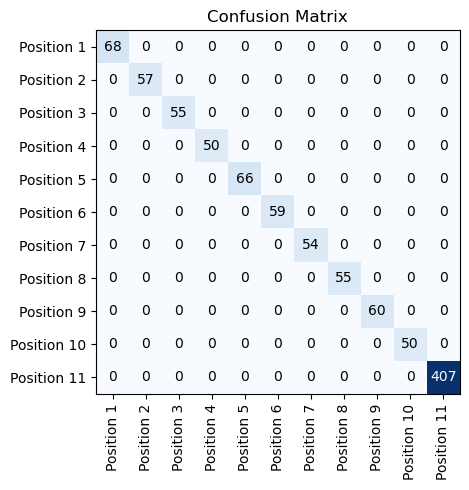

In [37]:
confusion_plot(y_test,y_pred,cm)

In [38]:
report = classification_report(y_test,y_pred) 
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        66
           6       1.00      1.00      1.00        59
           7       1.00      1.00      1.00        54
           8       1.00      1.00      1.00        55
           9       1.00      1.00      1.00        60
          10       1.00      1.00      1.00        50
          11       1.00      1.00      1.00       407

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



# <u>XGBoost Classifier</u>

In [39]:
y_train = y_train - 1
y_test  = y_test - 1

In [40]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    objective="multi:softprob",
    num_class=21,
    random_state=25,
    eval_metric="mlogloss"
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=21, ...)

### Training

In [41]:
training_pred = xgb.predict(X_train)
training_pred

array([ 7, 10, 10, ...,  8,  5,  9], dtype=int64)

In [42]:
accuracy = accuracy_score(y_train,training_pred)
print("Accuracy Score: ",accuracy)

Accuracy Score:  1.0


In [43]:
cm = confusion_matrix(y_train,training_pred)
cm 

array([[ 165,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  176,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,  178,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  183,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  167,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  174,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  179,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  178,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  173,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  183,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1184]],
      dtype=int64)

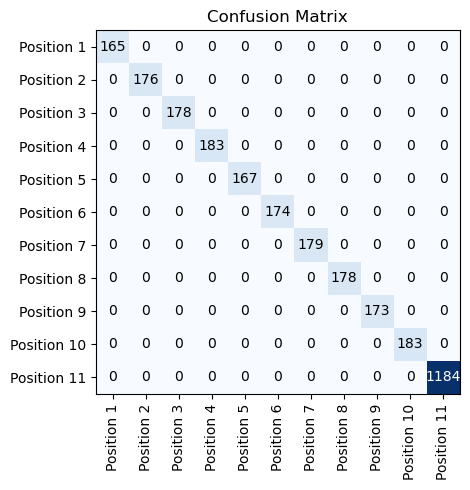

In [44]:
confusion_plot(y_train,training_pred,cm)

In [45]:
report = classification_report(y_train,training_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       176
           2       1.00      1.00      1.00       178
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00       167
           5       1.00      1.00      1.00       174
           6       1.00      1.00      1.00       179
           7       1.00      1.00      1.00       178
           8       1.00      1.00      1.00       173
           9       1.00      1.00      1.00       183
          10       1.00      1.00      1.00      1184

    accuracy                           1.00      2940
   macro avg       1.00      1.00      1.00      2940
weighted avg       1.00      1.00      1.00      2940



### Testing

In [46]:
y_pred = xgb.predict(X_test)
y_pred

array([ 0,  8,  8, 10,  2,  7,  5,  1,  5,  5, 10,  3,  2, 10,  6, 10, 10,
        1,  3,  8,  0, 10,  1,  7, 10, 10,  2, 10,  7, 10, 10,  2,  0, 10,
        8,  6,  7,  8,  8, 10,  4,  6,  7,  2, 10,  2, 10,  6, 10,  5, 10,
        7, 10, 10,  5, 10, 10,  4,  3, 10,  2,  9, 10, 10,  5,  1, 10,  1,
        7, 10, 10,  9,  0, 10, 10,  4, 10,  3, 10, 10,  6,  3, 10, 10, 10,
       10,  2,  8, 10,  8,  3,  8, 10, 10, 10,  0, 10,  9,  2, 10,  0,  8,
       10,  6,  0,  8, 10,  0, 10, 10,  9, 10,  0,  0,  1, 10, 10,  4, 10,
       10, 10,  7,  8,  8,  2,  4, 10,  8, 10,  9,  4,  5, 10,  8,  9, 10,
       10,  4,  6, 10,  9, 10,  0,  1,  0, 10, 10, 10, 10, 10,  5,  7,  3,
        8,  7, 10,  1,  8,  3,  1,  5, 10,  4, 10,  0, 10,  0,  2, 10,  0,
       10, 10,  5,  4,  4,  5,  9, 10, 10,  9,  3,  0,  9, 10, 10,  4,  4,
        6,  9, 10, 10,  7,  5,  6, 10, 10,  0, 10,  6,  9,  6, 10,  6, 10,
        7,  6,  5,  5,  4,  7, 10,  1,  2, 10,  4,  2,  2, 10, 10,  6,  0,
       10,  8, 10,  4,  9

In [47]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",accuracy)

Accuracy Score:  1.0


In [48]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 68,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  55,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  50,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  66,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  59,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  54,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  55,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  60,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  50,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 407]],
      dtype=int64)

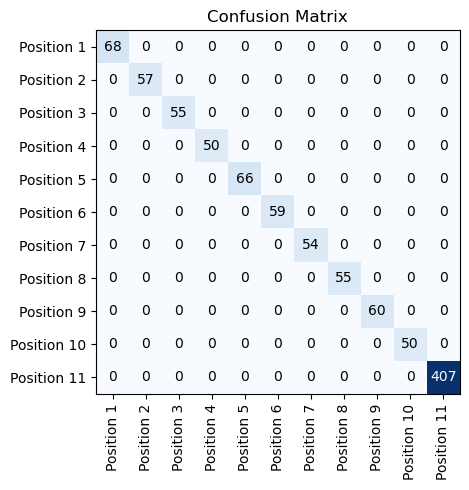

In [49]:
confusion_plot(y_test,y_pred,cm)

In [50]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        66
           5       1.00      1.00      1.00        59
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        60
           9       1.00      1.00      1.00        50
          10       1.00      1.00      1.00       407

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



In [51]:
df.columns

Index(['Pos.', 'No.', 'Laps', 'Pts.', 'Time_seconds', 'Driver_code',
       'Country_code', 'Team_code', 'Pos_class'],
      dtype='object')